In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pickle
from glob import glob

In [2]:
title_font = 16
label_font = 16
legend_font = 7

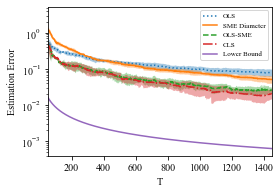

In [5]:
folder_name = 'CDC25' 
disturbance = 'uniform'
W = 2
start = 10
d = 16
plt.figure()
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10.colors)
plt.rcParams["font.family"] = "Times New Roman"

paths = list(filter(
    lambda x: 'SME' not in x,
    glob(folder_name + '/*.pkl'))) # 


###################### OLS ######################
OLS = []
for i, path in enumerate(paths):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    arr = np.array(data['OLS'])
    arr[arr == None] = 0
    arr = arr.astype(np.float64) 
    # arr = arr.astype(type(0))
    OLS.append(arr[arr != 0])

OLS_mean = np.mean(OLS, axis=0)
OLS_std = np.std(OLS, axis=0)
t3 = np.nonzero(arr)[0]

plt.semilogy(t3[start+d:], OLS_mean[start+d:], ':', label='OLS')
plt.fill_between(t3[start+d:], OLS_mean[start+d:] + OLS_std[start+d:], OLS_mean[start+d:] - OLS_std[start+d:],alpha=0.4)


# ###################### SME ######################
SME = []
for i, path in enumerate(paths):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    arr = np.array(data['SME'])
    arr[arr == None] = 0
    arr = arr.astype(np.float64) 
    # arr = arr.astype(type(0))
    SME.append(arr[arr != 0])


SME_mean = np.mean(SME, axis=0)
SME_std = np.std(SME, axis=0)
t1 = np.nonzero(arr)[0]

plt.semilogy(t1[start:], SME_mean[start:],  label='SME Diameter')
plt.fill_between(t1[start:], SME_mean[start:] + SME_std[start:], SME_mean[start:] - SME_std[start:],alpha=0.4)


# # ###################### OLS-SME ######################
PROJ = []
for i, path in enumerate(paths):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    arr = np.array(data['PROJ'])
    arr[arr == None] = 0
    arr = arr.astype(np.float64) 
    # arr = arr.astype(type(0))
    PROJ.append(arr[arr != 0])


PROJ_mean = np.mean(PROJ, axis=0)
PROJ_std = np.std(PROJ, axis=0)
t5 = np.nonzero(arr)[0]

plt.semilogy(t5[start:], PROJ_mean[start:], '--', label='OLS-SME')
plt.fill_between(t5[start:], PROJ_mean[start:] + PROJ_std[start:], PROJ_mean[start:] - PROJ_std[start:],alpha=0.4)


# ###################### CLS ######################
CLS = []
for i, path in enumerate(paths):
    with open(path, 'rb') as f:
        data = pickle.load(f)
        arr = np.array(data['CLS'])
        arr[arr == None] = 0
        arr = arr.astype(np.float64) 
        # arr = arr.astype(type(0))
        CLS.append(arr[arr != 0])


CLS_mean = np.mean(CLS, axis=0)
CLS_std = np.std(CLS, axis=0)
t4 = np.nonzero(arr)[0]

plt.semilogy(t4[start:], CLS_mean[start:], '-.', label='CLS')
plt.fill_between(t4[start:], CLS_mean[start:] + CLS_std[start:], CLS_mean[start:] - CLS_std[start:],alpha=0.4)


# ###################### Lower bound ######################
paths = list(filter(
    lambda x: 'SME' not in x,
    glob(folder_name + '/error*T=1500*.pkl'))) # 
SME = []
for i, path in enumerate(paths):
    with open(path, 'rb') as f:
        data = pickle.load(f)
LB = data['LB']
t2 = np.nonzero(LB)[0]
plt.semilogy(t2[start+d:], LB[start+d:], label='Lower Bound')




plt.rcParams['figure.figsize'] = [4, 2.8]
plt.legend(fontsize=7, loc='upper right')
plt.xlim([50,1450])
plt.xlabel('T')
plt.ylabel('Estimation Error')
plt.tight_layout()

plt.savefig("CDC_plots/uniform.pdf", format="pdf", bbox_inches="tight")